Rented Bike Count - Upper outliers:
 2946    2401
2994    2402
3114    2401
3210    2404
3282    2692
        ... 
7746    2631
7818    2613
7842    2415
7866    2612
7890    2632
Name: Rented Bike Count, Length: 158, dtype: int64
Wind speed - Upper outliers:
 82      4.5
84      4.8
85      5.4
86      4.5
87      5.8
       ... 
7934    4.4
7937    5.7
7985    4.9
8242    4.7
8245    5.3
Name: Wind speed, Length: 161, dtype: float64


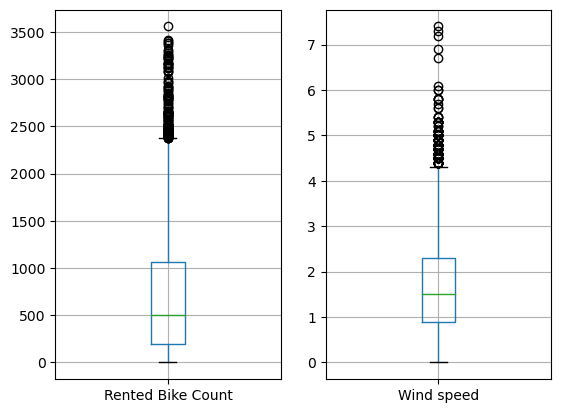

Rented Bike Count - Upper outliers:
 3186    2359
3474    2318
3690    2310
3927    2329
3930    2338
        ... 
6883    2365
7193    2349
7194    2339
8082    2314
8154    2357
Name: Rented Bike Count, Length: 62, dtype: int64


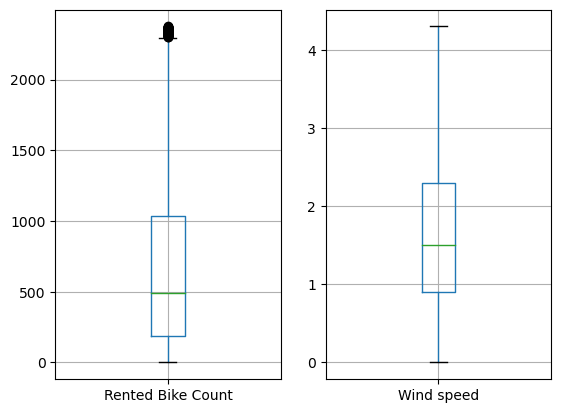

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Helper function
def findMinMax(data):
  q1 = data.quantile(0.25)
  q3 = data.quantile(0.75)
  min = q1 - 1.5 * (q3 - q1)
  max = q3 + 1.5 * (q3 - q1)
  return min, max

# Function to help us visualize the outliers. Produce boxplot and print out outliers
def getOutliers(data, features):
  for i, feature in enumerate(features, 1):
    plt.subplot(1,len(features),i)
    data[[feature]].boxplot()
    
    min, max = findMinMax(data[feature])
    outliers_lower = data[feature] < min
    outliers_upper = data[feature] > max
    
    if outliers_lower.any():
      print(feature, "- Lower outliers:\n", data.loc[outliers_lower, feature])
    if outliers_upper.any():
      print(feature, "- Upper outliers:\n", data.loc[outliers_upper, feature])

  plt.show()
  

# Return a new set of data with outliers removed
def removeOutliers(data, features):
  removeIdx = pd.Series([False] * len(data))
  for i, feature in enumerate(features):
    min, max = findMinMax(data[feature])
    outliers_lower = data[feature] < min
    outliers_upper = data[feature] > max
    
    removeIdx = removeIdx | outliers_lower | outliers_upper

  return data.loc[~removeIdx]
  


# Testing code
data = pd.DataFrame(pd.read_csv('./SeoulBikeData.csv'))
features = ['Rented Bike Count', 'Wind speed']

getOutliers(data, features)

newData = removeOutliers(data, features)
getOutliers(newData, features)

Rented Bike Count - Upper outliers:
 2946    2401
2994    2402
3114    2401
3210    2404
3282    2692
        ... 
7746    2631
7818    2613
7842    2415
7866    2612
7890    2632
Name: Rented Bike Count, Length: 152, dtype: int64
Wind speed - Upper outliers:
 82      4.5
84      4.8
85      5.4
86      4.5
87      5.8
       ... 
7932    4.9
7933    4.6
7934    4.4
7937    5.7
7985    4.9
Name: Wind speed, Length: 154, dtype: float64
Solar Radiation - Upper outliers:
 1741    2.35
1885    2.46
1886    2.39
1982    2.49
2054    2.36
        ... 
7741    2.43
7764    2.37
7765    2.45
7788    2.33
7789    2.40
Name: Solar Radiation, Length: 620, dtype: float64
Rainfall - Upper outliers:
 51       0.5
54       1.0
57       2.5
78       0.1
120      0.1
        ... 
8229    18.0
8520     0.2
8523     1.0
8601     9.1
8604     1.8
Name: Rainfall, Length: 516, dtype: float64
Snowfall - Upper outliers:
 120     0.1
121     0.3
122     0.4
123     0.4
124     0.4
       ... 
8645    0.3
8646 

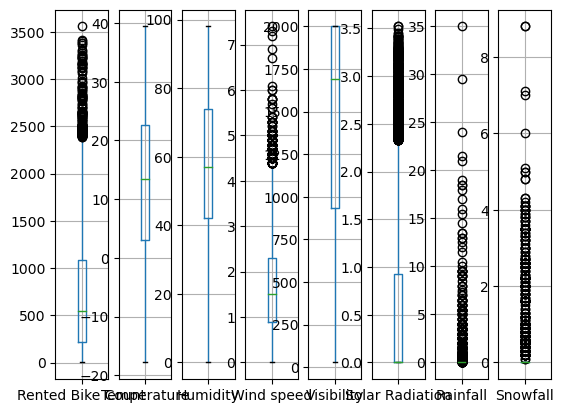

      Rented Bike Count  Hour  Temperature  Humidity  Wind speed  Visibility  \
0                   254     0         -5.2        37         2.2        2000   
1                   204     1         -5.5        38         0.8        2000   
2                   173     2         -6.0        39         1.0        2000   
3                   107     3         -6.2        40         0.9        2000   
4                    78     4         -6.0        36         2.3        2000   
...                 ...   ...          ...       ...         ...         ...   
8154               1003    19          4.2        34         2.6        1894   
8155                764    20          3.4        37         2.3        2000   
8156                694    21          2.6        39         0.3        1968   
8157                712    22          2.1        41         1.0        1859   
8158                584    23          1.9        43         1.3        1909   

      Solar Radiation  Rainfall  Snowfa

In [12]:
from sklearn.preprocessing import StandardScaler

data = pd.DataFrame(pd.read_csv('./SeoulBikeData.csv'))

# Remove rows with non-functioning day / no bike rented
functioningDay = data['Functioning Day'] == 'Yes'
data = data.loc[functioningDay]

# Dropping some features:
# Date: can't process and we already have the holiday feature
# Dew temp: not relevant
# Functioning day: already process
data = data.drop(columns=['Date', 'Dew point temperature', 'Functioning Day'])


# One Hot Encode categorical features
# Hour should be categorical too. Not sure how to handle it yet
data = pd.get_dummies(data, columns=['Seasons'], dtype=int)
data = pd.get_dummies(data, columns=['Holiday'], dtype=int, drop_first=True)


getOutliers(data, ['Rented Bike Count', 'Temperature', 'Humidity', 'Wind speed', 'Visibility', 'Solar Radiation', 'Rainfall', 'Snowfall'])

# It seems like every rainy or snowy days are counted as outliers because the weather is normal most of the time.
# Therefore, not going to remove outliers for Rainfall and Snowfall

# A lot of outliers for Solar Radiation. We can test this out with our models. For now, not removing outliers for this one

# Around 150 outliers for Rented Bike Count and Wind Speed. Remove outliers for now

data = removeOutliers(data, ['Rented Bike Count', 'Temperature', 'Humidity', 'Wind speed', 'Visibility'])
data = data.reset_index(drop=True)
print(data)


# Splitting data between categorical and numericals set for standardization
categoricalFeatures = ['Hour', 'Seasons_Autumn', 'Seasons_Spring', 'Seasons_Summer', 'Seasons_Winter', 'Holiday_No Holiday']
numericalFeatures = ['Rented Bike Count', 'Temperature', 'Humidity', 'Wind speed', 'Visibility', 'Solar Radiation', 'Rainfall', 'Snowfall']
categoricalValues = data[categoricalFeatures]
standardizedData = data.drop(columns=categoricalFeatures)

scaler = StandardScaler()
scaler.fit(standardizedData)
standardizedData = scaler.transform(standardizedData)
standardizedData = pd.DataFrame(standardizedData)
standardizedData.columns = numericalFeatures

standardizedData = pd.concat([standardizedData, categoricalValues], axis=1)
print("Standardized Data \n", standardizedData)

In [9]:
from sklearn.model_selection import KFold, train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

# Note, need to modify X as appropriate for the different types of regression by adding column of 1's or any other parameters as neccessary
def perform_training(X, y, folds, test_size=0.25):
    # Define number of folds for cross-validation
    kf = KFold(folds)

    # Initialize lists to store results for variance, bias2s, total_error, and models
    # FINISH 
    
    total_error = [] # list for total_error
    models = [] # list for models
    mses = []

    # Perform cross-validation
    for train_index, test_index in kf.split(X_poly):
        # Split data into training and testing sets for this fold
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # Fit polynomial regression model
        ridge_reg = SGDRegressor(loss='squared_loss',penalty='l2', alpha=0.0001,  max_iter=100,eta0=0.01, random_state=42)
        ridge_reg.fit(X_train, y_train)

        # Make predictions on the test set
        y_pred = ridge_reg.predict(X_test)

        # Calculate MSE for new model prediction
        mse = mean_squared_error(y_pred, y_test)
        
        # Append results to lists
        # FINISH
        mses.append(mse)
        models.append(model)

    # print the total_error of the best model
    min_error_index = np.argmin(mses)
    best_model = models[min_error_index]
    mse = mses[min_error_index]
    
    return mse, best_model

# Testing Code
X = standardizedData.data
y = standardizedData.target
perform_training(X, y, 10)


AttributeError: 'DataFrame' object has no attribute 'data'

In [ ]:
# Cell 3 Here